Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,Would_live_in_another_neighborhood,District,Gender,Place_of_birth,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_citizen_security,Barri_management,...,Social_class,Number_of_people_in_the_house,Help_with_housework,Disability,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_citizen_security
0,0.0,SANTS - MONTJUÏC,0,FOREIGN,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,"NEITHER BAD, NOR GOOD","NEITHER BAD, NOR GOOD",...,MIDDLE-MIDDLE,TWO,0.0,0.0,0,0,0,0,0,0
2,0.0,SANTS - MONTJUÏC,1,BARCELONA,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL GET WORSE,SATISFIED,GOOD,"NEITHER BAD, NOR GOOD",...,MIDDLE-LOW,ONE,0.0,0.0,1,0,0,0,0,0
3,0.0,SANTS - MONTJUÏC,1,REST OF CATALONIA,MORE THAN 10 YEARS,IT HAS IMPROVED,IT WILL STAY THE SAME,SATISFIED,GOOD,GOOD,...,MIDDLE-MIDDLE,ONE,1.0,0.0,0,0,0,0,0,0
4,1.0,SANTS - MONTJUÏC,0,REST OF SPAIN,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,FAIRLY SATISFIED,"NEITHER BAD, NOR GOOD","NEITHER BAD, NOR GOOD",...,MIDDLE-LOW,TWO,0.0,1.0,0,0,1,0,0,0
5,0.0,SANTS - MONTJUÏC,1,REST OF CATALONIA,MORE THAN 10 YEARS,IT HAS IMPROVED,IT WILL STAY THE SAME,SATISFIED,GOOD,"NEITHER BAD, NOR GOOD",...,MIDDLE-MIDDLE,TWO,1.0,0.0,0,1,0,0,0,0


In [5]:
data.shape

(1191, 25)

In [6]:
# Dataset is imbalanced
data.groupby(['Would_live_in_another_neighborhood']).size()

Would_live_in_another_neighborhood
0.0    1032
1.0     159
dtype: int64

In [7]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Gender',
 'Place_of_birth',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_future',
 'Barri_satisfaction_of_living',
 'Barri_citizen_security',
 'Barri_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 'Owns_a_car',
 'House_owner',
 'Social_class',
 'Number_of_people_in_the_house',
 'Help_with_housework',
 'Disability',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_citizen_security']

In [64]:
x_var = data.columns.tolist()

In [65]:
for i in ['Would_live_in_another_neighborhood', 'Place_of_birth', 'Social_class',
          'Barri_satisfaction_of_living', 'BCN_over_barri_management']:
    x_var.remove(i)

In [66]:
x = data[x_var]

In [67]:
y = data['Would_live_in_another_neighborhood']

In [68]:
x = pd.get_dummies(x, drop_first=True)

In [69]:
x = sm.add_constant(x)

In [70]:
data.groupby(['Would_live_in_another_neighborhood']).size()

Would_live_in_another_neighborhood
0.0    1032
1.0     159
dtype: int64

In [71]:
resampling = SMOTE(sampling_strategy=0.5, random_state=0)
columns = x.columns
x_resampled, y_resampled=resampling.fit_sample(x.astype(int), y)
x_resampled = pd.DataFrame(data=x_resampled, columns=columns )
y_resampled = pd.DataFrame(data=y_resampled, columns=['Would_live_in_another_neighborhood'])

print("length of oversampled data is ",len(x_resampled))
print("Number of people who would like to live in another neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==1]))
print("Number of people who would stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==0]))
print("Proportion of people who would like to live in another neighborhood in resampled data is ",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==1])/len(x_resampled))
print("Proportion of people who would stay in the neighborhood in resampled data is ",
      len(y_resampled[y_resampled['Would_live_in_another_neighborhood']==0])/len(x_resampled))

length of oversampled data is  1548
Number of people who would like to live in another neighborhood in resampled data 516
Number of people who would stay in the neighborhood in resampled data 1032
Proportion of people who would like to live in another neighborhood in resampled data is  0.3333333333333333
Proportion of people who would stay in the neighborhood in resampled data is  0.6666666666666666


In [72]:
x_resampled

,const,Gender,Barri_association,Owns_a_car,House_owner,Help_with_housework,Disability,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,...,"Barri_citizen_security_NEITHER BAD, NOR GOOD",Barri_management_GOOD,"Barri_management_NEITHER BAD, NOR GOOD",Barri_comparison_ONE OF THE BEST,Barri_comparison_ONE OF THE WORST,Barri_transport_GOOD,"Barri_transport_NEITHER BAD, NOR GOOD",Number_of_people_in_the_house_ONE,Number_of_people_in_the_house_THREE,Number_of_people_in_the_house_TWO
0,1,0,1,1,1,0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,1
1,1,1,0,0,1,0,0,1,0,0,...,0,0,1,1,0,1,0,1,0,0
2,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,1,0,0,1,...,1,0,1,0,0,0,1,0,0,1
4,1,1,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1,0,0,1,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1544,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1545,1,1,0,0,1,1,1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1546,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
y_resampled['Would_live_in_another_neighborhood'].unique()

array([0., 1.])

In [74]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.368047
         Iterations 8
                                       Results: Logit
Model:                  Logit                                Pseudo R-squared:   0.422      
Dependent Variable:     Would_live_in_another_neighborhood   AIC:                1215.4726  
Date:                   2021-05-03 20:10                     BIC:                1418.5719  
No. Observations:       1548                                 Log-Likelihood:     -569.74    
Df Model:               37                                   LL-Null:            -985.32    
Df Residuals:           1510                                 LLR p-value:        1.5210e-150
Converged:              1.0000                               Scale:              1.0000     
No. Iterations:         8.0000                                                              
--------------------------------------------------------------------------------------------
       

In [75]:
result.pvalues.sort_values(ascending=False)

BCN_over_barri_citizen_security                 9.914965e-01
BCN_over_barri_future                           8.581419e-01
BCN_over_barri_evolution                        7.470124e-01
Owns_a_car                                      5.908225e-01
House_owner                                     4.822915e-01
Barri_transport_NEITHER BAD, NOR GOOD           2.628205e-01
Barri_comparison_ONE OF THE WORST               2.580589e-01
Disability                                      2.001718e-01
Barri_transport_GOOD                            1.384704e-01
Help_with_housework                             1.318316e-01
Time_living_in_barri_LESS THAN 10 YEARS         1.811587e-02
Time_living_in_barri_MORE THAN 10 YEARS         8.982604e-03
Barri_citizen_security_NEITHER BAD, NOR GOOD    8.120470e-03
Barri_future_IT WILL IMPROVE                    7.346060e-03
Barri_future_IT WILL STAY THE SAME              6.558473e-03
Barri_citizen_security_GOOD                     4.937615e-03
Gender                  

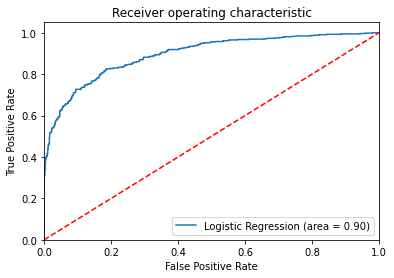

In [76]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [77]:
for i in ['BCN_over_barri_citizen_security', 
          'BCN_over_barri_future', 'BCN_over_barri_evolution', 
          'Owns_a_car']:
    del x_resampled[i]

In [78]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.368181
         Iterations 8
                                       Results: Logit
Model:                  Logit                                Pseudo R-squared:   0.422      
Dependent Variable:     Would_live_in_another_neighborhood   AIC:                1207.8898  
Date:                   2021-05-03 20:10                     BIC:                1389.6102  
No. Observations:       1548                                 Log-Likelihood:     -569.94    
Df Model:               33                                   LL-Null:            -985.32    
Df Residuals:           1514                                 LLR p-value:        3.0930e-153
Converged:              1.0000                               Scale:              1.0000     
No. Iterations:         8.0000                                                              
--------------------------------------------------------------------------------------------
       

In [79]:
result.pvalues.sort_values(ascending=False)

House_owner                                     4.203228e-01
Barri_comparison_ONE OF THE WORST               2.690279e-01
Barri_transport_NEITHER BAD, NOR GOOD           2.656924e-01
Disability                                      1.863237e-01
Barri_transport_GOOD                            1.399592e-01
Help_with_housework                             1.342415e-01
Time_living_in_barri_LESS THAN 10 YEARS         1.828755e-02
Time_living_in_barri_MORE THAN 10 YEARS         9.224438e-03
Barri_citizen_security_NEITHER BAD, NOR GOOD    8.059822e-03
Barri_future_IT WILL STAY THE SAME              7.214732e-03
Barri_future_IT WILL IMPROVE                    5.823368e-03
Barri_citizen_security_GOOD                     4.483323e-03
BCN_over_barri_satisfaction_of_living           1.870759e-03
Gender                                          1.764087e-03
BCN_over_barri_transport                        1.217024e-03
Barri_association                               1.009819e-03
Barri_management_NEITHER

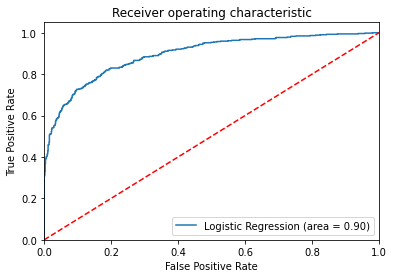

In [80]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [81]:
for i in ['House_owner', 'Barri_transport_NEITHER BAD, NOR GOOD', 'Barri_transport_GOOD']:
    del x_resampled[i]

In [82]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.369105
         Iterations 8
                                       Results: Logit
Model:                  Logit                                Pseudo R-squared:   0.420      
Dependent Variable:     Would_live_in_another_neighborhood   AIC:                1204.7480  
Date:                   2021-05-03 20:10                     BIC:                1370.4343  
No. Observations:       1548                                 Log-Likelihood:     -571.37    
Df Model:               30                                   LL-Null:            -985.32    
Df Residuals:           1517                                 LLR p-value:        8.6216e-155
Converged:              1.0000                               Scale:              1.0000     
No. Iterations:         8.0000                                                              
--------------------------------------------------------------------------------------------
       

In [45]:
result.pvalues.sort_values(ascending=False)

Barri_transport_NEITHER BAD, NOR GOOD           2.866055e-01
Barri_comparison_ONE OF THE WORST               2.725755e-01
Disability                                      1.900698e-01
Help_with_housework                             1.520060e-01
Barri_transport_GOOD                            1.505744e-01
Time_living_in_barri_LESS THAN 10 YEARS         2.415825e-02
Barri_citizen_security_NEITHER BAD, NOR GOOD    7.740429e-03
Time_living_in_barri_MORE THAN 10 YEARS         7.632224e-03
Barri_future_IT WILL IMPROVE                    5.672076e-03
Barri_future_IT WILL STAY THE SAME              5.610037e-03
Barri_citizen_security_GOOD                     4.228704e-03
BCN_over_barri_satisfaction_of_living           1.841104e-03
Gender                                          1.609858e-03
BCN_over_barri_transport                        1.265507e-03
Barri_association                               1.177740e-03
Barri_management_NEITHER BAD, NOR GOOD          5.252823e-04
Barri_evolution_IT IS TH

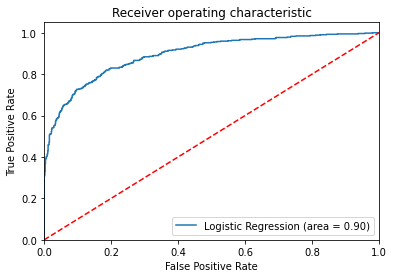

In [42]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [21]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_live_in_another_neighborhood
Method:                                          dydx
At:                                           overall
                                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Gender                                          -0.0565      0.018     -3.178      0.001      -0.091      -0.022
Barri_association                               -0.0709      0.023     -3.096      0.002      -0.116      -0.026
Owns_a_car                                       0.0174      0.020      0.875      0.382      -0.022       0.056
House_owner                                      0.0321      0.023      1.368      0.171      -0.014       0.078
Help_with_housework                             -0.0188      0.021     -0.913      0.361      -0.059      

In [22]:
result.pred_table()

array([[962.,  70.],
       [153., 363.]])

In [ ]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()